## Simple ANOVA Example

#### Mark Gibbs, Gibbs Consulting

A simple runthrough of ANOVA techniques, also touching on regression, using a classic dataset.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
from scipy import stats

This example uses the famous [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset. Here, a locally cached copy of the dataset, exported from a R session, is loaded from a csv file into a Pandas dataframe.

In [2]:
dfIris = pd.read_csv("raw_data/r_sample_iris.csv")
del dfIris['Unnamed: 0']
dfIris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


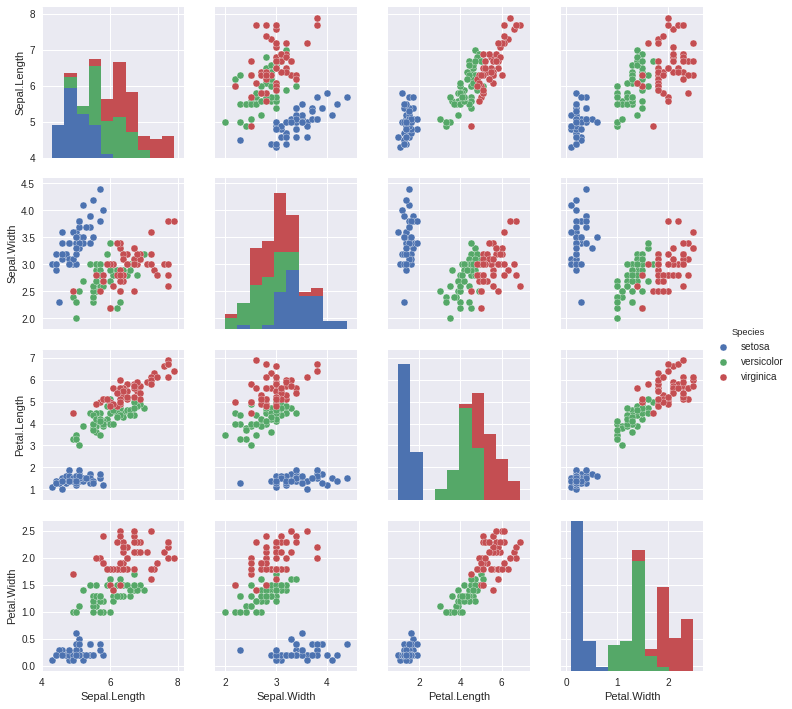

In [3]:
sns.pairplot(dfIris,hue="Species")

In [4]:
def simple_stats(series):
    return series.mean(),series.var(),series.count()

This function can be used to get overall properties, and also those of a subset.

In [5]:
simple_stats(dfIris['Sepal.Width'])

(3.0573333333333337, 0.18997941834451901, 150)

In [6]:
simple_stats(dfIris[dfIris['Species']=='setosa']['Sepal.Width'])

(3.4279999999999999, 0.14368979591836739, 50)

In [7]:
for label,t in dfIris.groupby(['Species']):
    print(label,simple_stats(t['Sepal.Width']))

setosa (3.4279999999999999, 0.14368979591836739, 50)
versicolor (2.7700000000000005, 0.098469387755102056, 50)
virginica (2.9740000000000002, 0.10400408163265305, 50)


At face value, it appears that sepal width has a different mean for the three
species. An [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance) test is a suitable technique for making a more formal statement of this property. This test can be performed for each of the four measurements. Each sample has a different variance, but the ANOVA test is assumed to be sufficiently robust against this.

The sample has 3 groups, each with 50 samples in. Thus there are 2 degrees of between-group freedom, and 147 degrees of within-group freedom, so the relevant F-statistic can be obtained from the $F(2,147)$ distribution.

In [8]:
for c in [0.01,0.05]:
    print("Critical statistic for %f confidence level is %s"%(c,stats.f.ppf(1-c,2,147)))

Critical statistic for 0.010000 confidence level is 4.75250039965
Critical statistic for 0.050000 confidence level is 3.05762065165


Text(0.5,0.98,'F(2,147) tail distribution: 1 - cdf(x)')

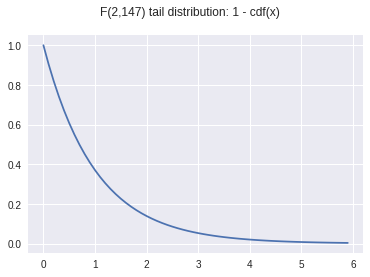

In [9]:
xvals = pd.Series(np.arange(0,6,0.1))
fDist = xvals.apply(lambda x: 1-stats.f.cdf(x,2,147))
plt.plot(xvals,fDist)
plt.suptitle("F(2,147) tail distribution: 1 - cdf(x)",fontsize=12)

In [10]:
for colName in dfIris.columns[:4]:
    print("One-way ANOVA on %s"%colName)
    samples = [x[colName] for _,x in dfIris.groupby(['Species'])]
    print("  --> %s"%str(stats.f_oneway(*samples)))

One-way ANOVA on Sepal.Length
  --> F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)
One-way ANOVA on Sepal.Width
  --> F_onewayResult(statistic=49.160040089612075, pvalue=4.4920171333091149e-17)
One-way ANOVA on Petal.Length
  --> F_onewayResult(statistic=1180.161182252981, pvalue=2.8567766109615584e-91)
One-way ANOVA on Petal.Width
  --> F_onewayResult(statistic=960.00714680180897, pvalue=4.1694458394431159e-85)


Whilst these values appear to unambiguously reject the null hypothesis of equal means, a refinement is
to use [Welch's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test). This
test develops a test statistic, similar to the well-known Student's t-test, but is much more robust in the face of unequal variances or sample sizes.

Ttest_indResult(statistic=9.4549758481285959, pvalue=1.8452599454769322e-15)
Ttest_indResult(statistic=3.2057607502218186, pvalue=0.0018191004238894803)
Ttest_indResult(statistic=6.4503490896307278, pvalue=4.2463553818449899e-09)


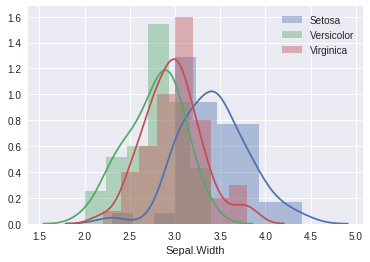

In [11]:
setosa = dfIris[dfIris['Species']=='setosa']
versicolor = dfIris[dfIris['Species']=='versicolor']
virginica = dfIris[dfIris['Species']=='virginica']
print(stats.ttest_ind(setosa['Sepal.Width'],versicolor['Sepal.Width']))
print(stats.ttest_ind(virginica['Sepal.Width'],versicolor['Sepal.Width']))
print(stats.ttest_ind(setosa['Sepal.Width'],virginica['Sepal.Width']))

sns.distplot(setosa['Sepal.Width'],label="Setosa")
sns.distplot(versicolor['Sepal.Width'],label="Versicolor")
sns.distplot(virginica['Sepal.Width'],label="Virginica")

plt.legend()

The histograms are formed from the actual measurements, and the lines are a density estimated using kernel methods.

Again, this test indicates unambigious differences between the means. Extension of the technique to other dimensions is straightforward.

setosa (1.4620000000000002, 0.030159183673469384, 50)
versicolor (4.2599999999999998, 0.22081632653061228, 50)
virginica (5.5520000000000005, 0.30458775510204084, 50)
Ttest_indResult(statistic=-39.492719391538095, pvalue=5.4049105134416774e-62)
Ttest_indResult(statistic=12.603779441384985, pvalue=3.1788195478061495e-22)
Ttest_indResult(statistic=-49.986186257095937, pvalue=1.5048006992427275e-71)


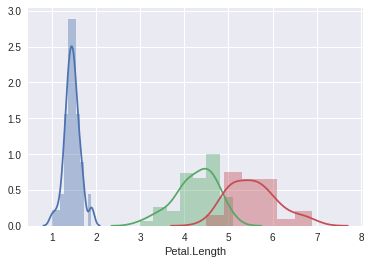

In [12]:
for label,t in dfIris.groupby(['Species']):
    print(label,simple_stats(t['Petal.Length']))

print(stats.ttest_ind(setosa['Petal.Length'],versicolor['Petal.Length']))
print(stats.ttest_ind(virginica['Petal.Length'],versicolor['Petal.Length']))
print(stats.ttest_ind(setosa['Petal.Length'],virginica['Petal.Length']))

sns.distplot(setosa['Petal.Length'])
sns.distplot(versicolor['Petal.Length'])
sns.distplot(virginica['Petal.Length'])

From the initial plots, it appears that there is some level of correlation between petal and sepal lengths. This can be formalised through regression.

In [13]:
regressAll = stats.linregress(x=dfIris['Petal.Length'],y=dfIris['Sepal.Length'])
regressAll

LinregressResult(slope=0.40892227735118492, intercept=4.3066034150475812, rvalue=0.87175377588658332, pvalue=1.0386674194496941e-47, stderr=0.018891338440538176)

Overall, the regression has some predictive power, but it is also possible to divide by species.

In [14]:
for label,t in dfIris.groupby(['Species']):
    print(label)
    regress = stats.linregress(x=t['Petal.Length'],y=t['Sepal.Length'])
    print(regress)

setosa
LinregressResult(slope=0.54229259710380284, intercept=4.2131682230342404, rvalue=0.26717575886875722, pvalue=0.060697783801134546, stderr=0.28231525574717226)
versicolor
LinregressResult(slope=0.82828096118299444, intercept=2.4075231053604438, rvalue=0.75404895859201604, pvalue=2.5861895052809548e-10, stderr=0.10413643454583578)
virginica
LinregressResult(slope=0.99573863636363658, intercept=1.0596590909090873, rvalue=0.86422473293557656, pvalue=6.2977857589036e-16, stderr=0.083667639152135778)


From this, it can be seen that the Setosa variant has little correlation between petal and sepal length, unlike the other two species.

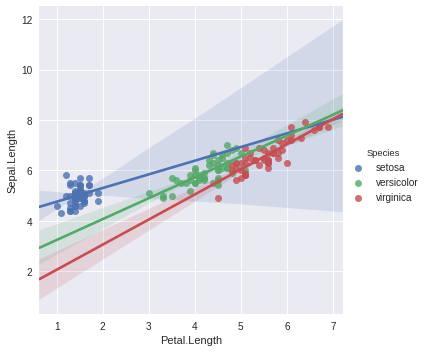

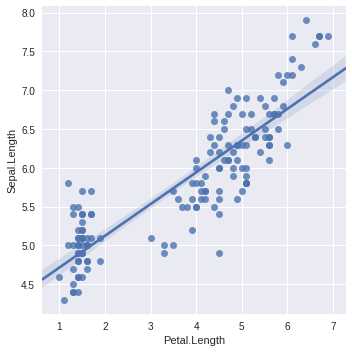

In [15]:
sns.lmplot(data=dfIris,x='Petal.Length',y='Sepal.Length',hue="Species")
sns.lmplot(data=dfIris,x='Petal.Length',y='Sepal.Length')